In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import re

from collections import Counter
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [2]:
discograph = pd.read_csv(r"C:\Users\littl\Documents\Python Projects\Lana Analysis Project\ldr_discography_released.csv")
discograph.head(100)

,album_title,album_url,category,album_track_number,song_title,song_url,song_artists,song_release_date,song_page_views,song_lyrics,song_writers,song_producers,song_tags
0,Blue Banisters,https://genius.com/albums/Lana-Del-Rey/Blue-Ba...,Blue Banisters,1,Text Book,https://genius.com/Lana-del-rey-text-book-lyrics,['Lana Del Rey'],5/20/2021,332900,I guess you could call it textbook I was looki...,"['Lana Del Rey', 'Gabe Simon']","['Lana Del Rey', 'Gabe Simon', 'Zach Dawes']","['Pop', 'Chamber Music', 'Singer-Songwriter', ..."
1,Blue Banisters,https://genius.com/albums/Lana-Del-Rey/Blue-Ba...,Blue Banisters,2,Blue Banisters,https://genius.com/Lana-del-rey-blue-banisters...,['Lana Del Rey'],5/20/2021,312200,There's a picture on the wall Of me on a John ...,"['Lana Del Rey', 'Gabe Simon']","['Lana Del Rey', 'Gabe Simon']","['Pop', 'Chamber Music', 'Singer-Songwriter', ..."
2,Blue Banisters,https://genius.com/albums/Lana-Del-Rey/Blue-Ba...,Blue Banisters,3,Arcadia,https://genius.com/Lana-del-rey-arcadia-lyrics,['Lana Del Rey'],9/8/2021,257600,My body is a map of LA I stand straight like a...,"['Lana Del Rey', 'Drew Erickson']","['Lana Del Rey', 'Drew Erickson']","['Pop', 'Adult Alternative', 'Chamber Music', ..."
3,Blue Banisters,https://genius.com/albums/Lana-Del-Rey/Blue-Ba...,Blue Banisters,4,Interlude - The Trio,https://genius.com/Lana-del-rey-interlude-the-...,['Lana Del Rey'],10/22/2021,49200,NaN,['Ennio Morricone'],['Lana Del Rey'],"['Pop', 'Experimental', 'Instrumental', 'Cinem..."
4,Blue Banisters,https://genius.com/albums/Lana-Del-Rey/Blue-Ba...,Blue Banisters,5,Black Bathing Suit,https://genius.com/Lana-del-rey-black-bathing-...,['Lana Del Rey'],10/22/2021,205000,"Grenadine quarantine, I like you a lot It's L....","['Lana Del Rey', 'Drew Erickson', 'Zach Dawes']","['Lana Del Rey', 'Zach Dawes', 'Dean Reid']","['Pop', 'Singer-Songwriter', 'Alternative Pop'..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Lust for Life,https://genius.com/albums/Lana-Del-Rey/Lust-fo...,Lust for Life,12,Beautiful People Beautiful Problems (Ft. Stevi...,https://genius.com/Lana-del-rey-beautiful-peop...,"['Lana Del Rey', 'Stevie Nicks']",7/21/2017,264500,Blue is the color of the planet from the view ...,"['Lana Del Rey', 'Stevie Nicks', 'Rick Nowels'...","['Lana Del Rey', 'Kieron Menzies', 'Dean Reid'...","['Pop', 'Singer-Songwriter', 'Dream Pop', 'Alt..."
96,Lust for Life,https://genius.com/albums/Lana-Del-Rey/Lust-fo...,Lust for Life,13,Tomorrow Never Came (Ft. Sean Lennon),https://genius.com/Lana-del-rey-tomorrow-never...,"['Lana Del Rey', 'Sean Lennon']",7/21/2017,296500,"""Hey, what you doin'?"" Not a lot Shakin' and m...","['Lana Del Rey', 'Sean Lennon', 'Rick Nowels']","['Sean Lennon', 'Lana Del Rey', 'Rick Nowels']","['Pop', 'Singer-Songwriter', 'Dream Pop', 'Alt..."
97,Lust for Life,https://genius.com/albums/Lana-Del-Rey/Lust-fo...,Lust for Life,14,Heroin,https://genius.com/Lana-del-rey-heroin-lyrics,['Lana Del Rey'],7/21/2017,510700,"Topanga is hot tonight, the city by the bay Ha...","['Rick Nowels', 'Lana Del Rey']","['Lana Del Rey', 'Dean Reid', 'Kieron Menzies'...","['Pop', 'Singer-Songwriter', 'Soft Rock', 'Fol..."
98,Lust for Life,https://genius.com/albums/Lana-Del-Rey/Lust-fo...,Lust for Life,15,Change,https://genius.com/Lana-del-rey-change-lyrics,['Lana Del Rey'],7/21/2017,337100,"There's somethin' in the wind, I can feel it b...","['Rick Nowels', 'Lana Del Rey']","['Lana Del Rey', 'Kieron Menzies', 'Rick Nowels']","['Pop', 'Chamber Music', 'Singer-Songwriter', ..."


In [3]:
#who does lana del rey collab with the most frequently?
collab = []
song_artists = discograph["song_artists"]

for i in range(len(song_artists)):
    edit_text = ""
    #convert into string to make an easier split
    for elem in song_artists[i]:
        if elem.isalnum() or elem == ' ' or elem == ',':
            edit_text += elem
    clean_text = edit_text.split(", ")
    
    for artist in clean_text:
        if artist != "Lana Del Rey":
            collab.append(artist)

#organize and count
#label it this way so that if there is any new collaborations it will update automatically
count = Counter(collab).values()
collab_name = Counter(collab).keys()

#verify that the amount of artists collaboarted matches its count and label
print(count)
print(collab_name)



dict_values([2, 1, 1, 1, 2, 1, 1, 2, 4, 1, 4, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1])
dict_keys(['Miles Kane', 'Nikki Lane', 'Weyes Blood', 'Zella Day', 'Jon Batiste', 'SYML', 'RIOPY', 'Father John Misty', 'Bleachers', 'Tommy Genesis', 'The Weeknd', 'Playboi Carti', 'AAP Rocky', 'Stevie Nicks', 'Sean Lennon', 'Ariana Grande', 'Miley Cyrus', 'BarrieJames ONeill', 'Cheryl', 'Smiler', 'BØRNS', 'Rob Grant', 'Taylor Swift', 'Matt Maeson', 'Saint Avangeline', 'Mando Diao', 'Bastille', 'Bobby Womack', 'Kacey Musgraves', 'Holly Macve', 'Cat Power', 'Emile Haynie'])


C:\Users\littl\AppData\Local\Temp\ipykernel_36764\3968798235.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs.set_xticklabels(collab_name, rotation = 90)


[Text(0, 0, 'Miles Kane'),
 Text(1, 0, 'Nikki Lane'),
 Text(2, 0, 'Weyes Blood'),
 Text(3, 0, 'Zella Day'),
 Text(4, 0, 'Jon Batiste'),
 Text(5, 0, 'SYML'),
 Text(6, 0, 'RIOPY'),
 Text(7, 0, 'Father John Misty'),
 Text(8, 0, 'Bleachers'),
 Text(9, 0, 'Tommy Genesis'),
 Text(10, 0, 'The Weeknd'),
 Text(11, 0, 'Playboi Carti'),
 Text(12, 0, 'AAP Rocky'),
 Text(13, 0, 'Stevie Nicks'),
 Text(14, 0, 'Sean Lennon'),
 Text(15, 0, 'Ariana Grande'),
 Text(16, 0, 'Miley Cyrus'),
 Text(17, 0, 'BarrieJames ONeill'),
 Text(18, 0, 'Cheryl'),
 Text(19, 0, 'Smiler'),
 Text(20, 0, 'BØRNS'),
 Text(21, 0, 'Rob Grant'),
 Text(22, 0, 'Taylor Swift'),
 Text(23, 0, 'Matt Maeson'),
 Text(24, 0, 'Saint Avangeline'),
 Text(25, 0, 'Mando Diao'),
 Text(26, 0, 'Bastille'),
 Text(27, 0, 'Bobby Womack'),
 Text(28, 0, 'Kacey Musgraves'),
 Text(29, 0, 'Holly Macve'),
 Text(30, 0, 'Cat Power'),
 Text(31, 0, 'Emile Haynie')]

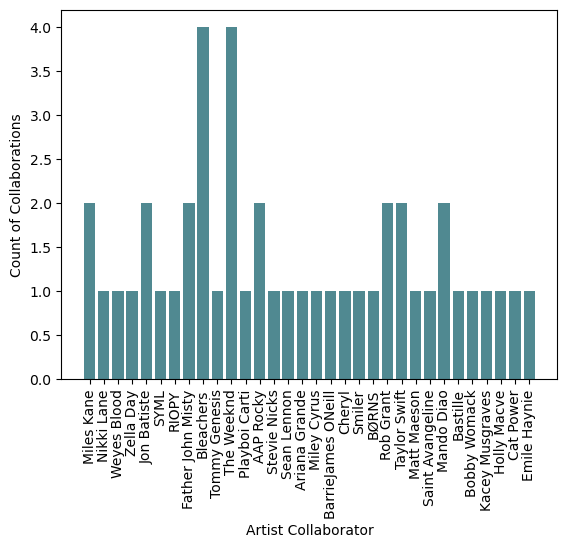

In [4]:
#histogram of collabs w/ lana

color = ['#508991' , '#09BC8A', '#004346', '#172A3A', '#74B3CE']

fig, axs = plt.subplots()


axs.bar(collab_name, count, color = color[0])

axs.set_ylabel('Count of Collaborations')
axs.set_xlabel('Artist Collaborator')

axs.set_xticklabels(collab_name, rotation = 90)


Text(0.5, 1.0, "Lana's Viewership on Genius")

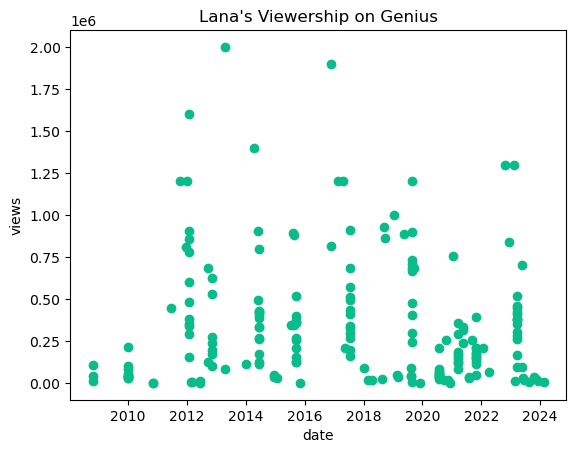

In [5]:
#songs pages least to most viewed...
discograph['song_release_date'] = pd.to_datetime(discograph['song_release_date'])

fig, ax = plt.subplots()


ax.scatter(discograph['song_release_date'], discograph['song_page_views'], color = color[1])


ax.set_ylabel('views')
ax.set_xlabel('date')
ax.set_title("Lana's Viewership on Genius")

In [41]:
#common-word + phrases

#list to seperate each word in the lyrics
words = []


#list and convert lyrics into string, and remove any non alphabetical words
#split into charc/words to count

for lyric in discograph['song_lyrics']:
    lyric = str(lyric)
    lyric = re.sub(r'[^A-Za-z0-9 ]+', '', lyric)
    words.extend(lyric.split(" "))

#count amount of each word
word_count = Counter(words)

#divided into count -> then the word
word_val = Counter(words).values()
common_words = Counter(words).keys()


print(word_count)


Counter({'I': 2171, 'the': 2082, 'you': 1862, 'me': 1391, 'to': 1192, 'a': 1050, 'my': 932, 'in': 835, 'and': 743, 'Im': 739, 'it': 668, 'on': 648, 'like': 599, 'of': 579, 'your': 542, 'that': 528, 'for': 512, 'And': 478, 'love': 454, 'all': 366, 'You': 362, 'is': 359, 'know': 357, 'dont': 342, 'be': 338, 'up': 336, 'baby': 309, 'do': 308, 'just': 297, 'with': 279, 'was': 239, 'But': 233, 'got': 225, 'we': 223, 'youre': 215, 'can': 206, 'what': 201, 'at': 200, 'get': 196, 'this': 187, 'Its': 187, 'not': 186, 'its': 186, 'no': 177, 'out': 175, 'now': 174, 'Cause': 168, 'but': 166, 'so': 166, 'have': 165, 'wanna': 164, 'when': 162, 'God': 152, 'want': 152, 'go': 150, 'down': 148, 'The': 146, 'if': 145, 'are': 144, 'were': 143, 'time': 142, '': 141, 'life': 140, 'Oh': 140, 'never': 135, 'Ive': 134, 'say': 133, 'take': 133, 'girl': 132, 'one': 129, 'from': 128, 'We': 125, 'Dont': 124, 'Like': 123, 'yeah': 122, 'make': 120, 'said': 120, 'think': 116, 'What': 116, 'feel': 116, 'about': 115, 

C:\Users\littl\AppData\Local\Temp\ipykernel_36764\2234493707.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  plot.set_xticklabels(common_words, rotation = 90)


[Text(0, 0, 'I'),
 Text(1, 0, 'guess'),
 Text(2, 0, 'you'),
 Text(3, 0, 'could'),
 Text(4, 0, 'call'),
 Text(5, 0, 'it'),
 Text(6, 0, 'textbook'),
 Text(7, 0, 'was'),
 Text(8, 0, 'lookin'),
 Text(9, 0, 'for'),
 Text(10, 0, 'the'),
 Text(11, 0, 'father'),
 Text(12, 0, 'wanted'),
 Text(13, 0, 'back'),
 Text(14, 0, 'And'),
 Text(15, 0, 'thought'),
 Text(16, 0, 'found'),
 Text(17, 0, 'in'),
 Text(18, 0, 'Brentwood'),
 Text(19, 0, 'It'),
 Text(20, 0, 'seemed'),
 Text(21, 0, 'only'),
 Text(22, 0, 'appropriate'),
 Text(23, 0, 'youd'),
 Text(24, 0, 'easily'),
 Text(25, 0, 'have'),
 Text(26, 0, 'my'),
 Text(27, 0, 'then'),
 Text(28, 0, 'there'),
 Text(29, 0, 'issue'),
 Text(30, 0, 'of'),
 Text(31, 0, 'her'),
 Text(32, 0, 'didnt'),
 Text(33, 0, 'even'),
 Text(34, 0, 'like'),
 Text(35, 0, 'myself'),
 Text(36, 0, 'or'),
 Text(37, 0, 'love'),
 Text(38, 0, 'life'),
 Text(39, 0, 'had'),
 Text(40, 0, 'were'),
 Text(41, 0, 'with'),
 Text(42, 0, 'shining'),
 Text(43, 0, 'stars'),
 Text(44, 0, 'Standin')

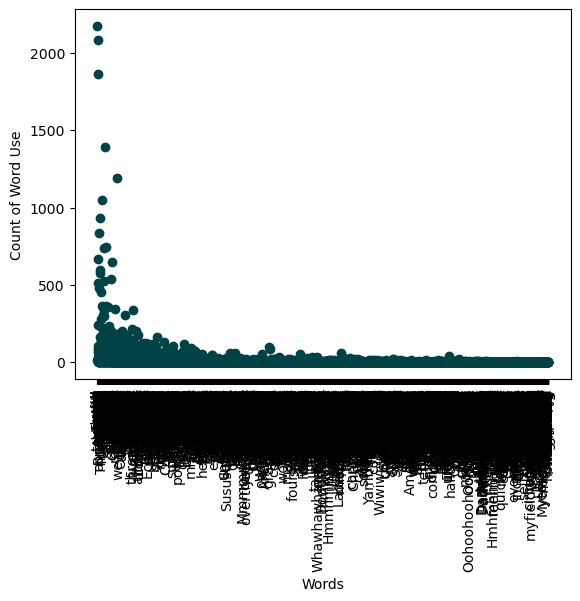

In [47]:
#plotting the above data
fig, plot = plt.subplots()

plot.scatter(common_words, word_val, color = color[2])

plot.set_ylabel('Count of Word Use')
plot.set_xlabel('Words')

plot.set_xticklabels(common_words, rotation = 90)

In [ ]:
#correlation between tags and artist
y = collab
X = data.drop(collab, axis = 1)

#generate values for x + y
X_train, X_val, y_train, y_val = train_test_split(X,y, test_size = 0.2, random_state = 42)

clf = LogisticRegression(random_state = 0, max_iter = 1000).fit(X_train, y_train)

#make the actual predictions
predictions = clf.predict(X_val)


#make an accuaracy using the regression model + test split
accuracy_score(y_val, predictions)

#make a prediction for the submission
submission_preds = clf.predict(test)

# generate a table using predicitve model of passengerid and survived
df = pd.DataFrame({"PassengerId":test_ids.values,
                   "Survived": submission_preds,
                  })